In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_final_demo = pd.read_csv("df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("df_final_experiment_clients.txt")
df_final_web_data_pt_1 = pd.read_csv("df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("df_final_web_data_pt_2.txt")

## clean df_final_demo

In [7]:
df_final_demo.head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


In [8]:
df_final_demo.shape

(70609, 9)

In [9]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [13]:
df_final_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [14]:
df_final_demo.nunique().sort_values(ascending=False)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
gendr                   4
dtype: int64

In [15]:
df_final_demo[df_final_demo.duplicated()]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth


In [41]:
#Eliminar valores nulos

df_final_demo = df_final_demo.dropna()

In [42]:
#Corregir formatos
df_final_demo[["clnt_tenure_yr","clnt_tenure_mnth","clnt_age","num_accts","logons_6_mnth","calls_6_mnth"]] = df_final_demo[["clnt_tenure_yr","clnt_tenure_mnth","clnt_age","num_accts","logons_6_mnth","calls_6_mnth"]].astype(int)

In [44]:
#Corregir valores extraños
df_final_demo["gendr"] = df_final_demo["gendr"].replace({"X":"U"})

In [45]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70594 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70594 non-null  int64  
 1   clnt_tenure_yr    70594 non-null  int32  
 2   clnt_tenure_mnth  70594 non-null  int32  
 3   clnt_age          70594 non-null  int32  
 4   gendr             70594 non-null  object 
 5   num_accts         70594 non-null  int32  
 6   bal               70594 non-null  float64
 7   calls_6_mnth      70594 non-null  int32  
 8   logons_6_mnth     70594 non-null  int32  
dtypes: float64(1), int32(6), int64(1), object(1)
memory usage: 3.8+ MB


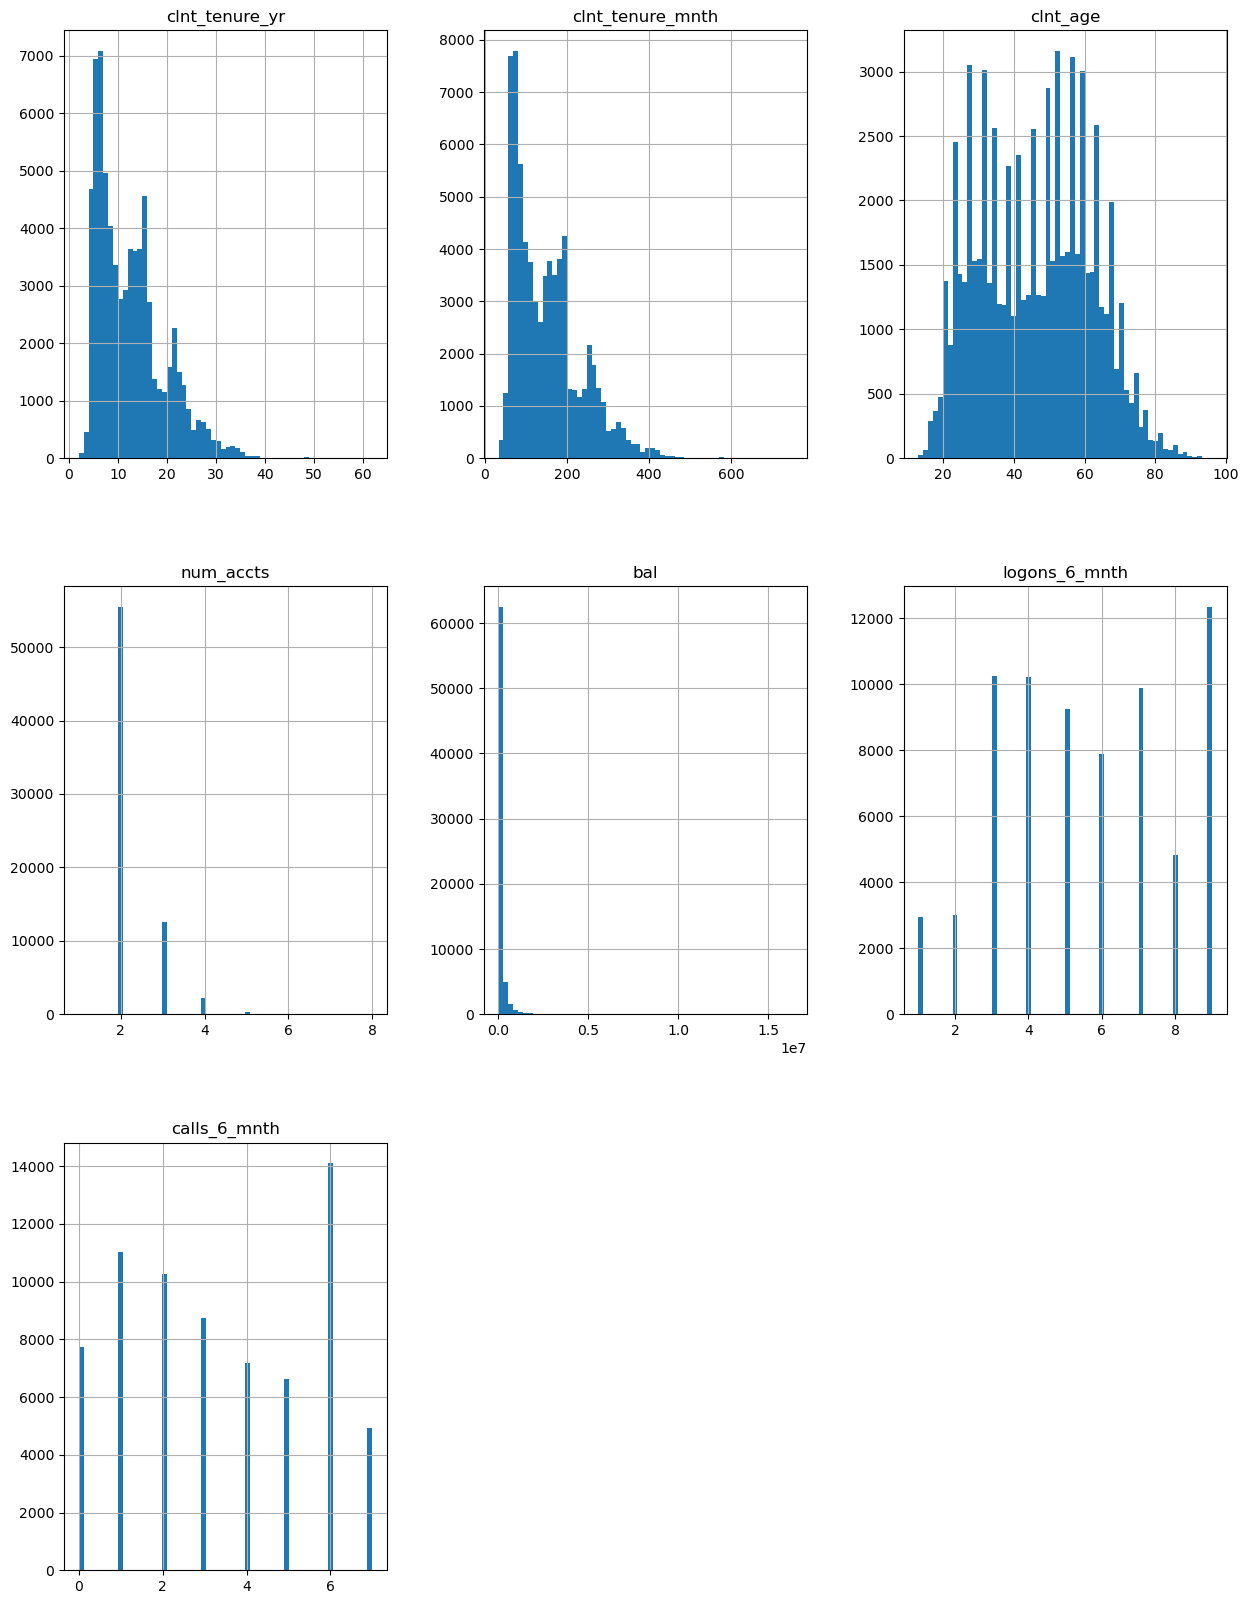

In [55]:
df_final_demo_numeric = df_final_demo[["clnt_tenure_yr","clnt_tenure_mnth","clnt_age","num_accts","bal","logons_6_mnth","calls_6_mnth"]]
df_final_demo_numeric.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show()

C:\Users\osanc\AppData\Local\Temp\ipykernel_28024\711213842.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_demo, x='gendr', palette="Set3", legend=False)


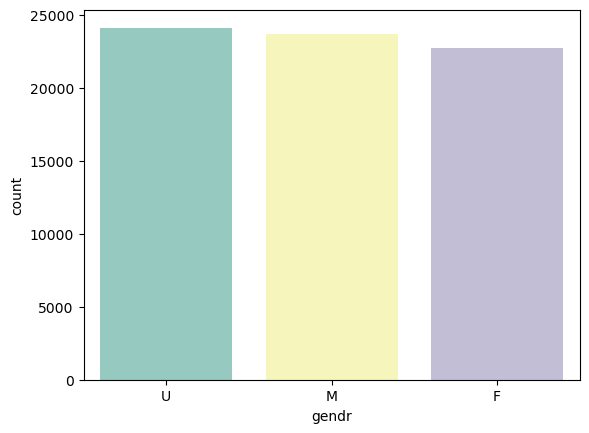

In [49]:
sns.countplot(data=df_final_demo, x='gendr', palette="Set3", legend=False)
plt.show()

## clean df_final_experiment_clients

In [22]:
df_final_experiment_clients.head(3)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


In [23]:
df_final_experiment_clients.shape

(70609, 2)

In [24]:
df_final_experiment_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [25]:
df_final_experiment_clients.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [26]:
df_final_experiment_clients["Variation"].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [27]:
df_final_experiment_clients["Variation"].value_counts(normalize=True)

Variation
Test       0.53402
Control    0.46598
Name: proportion, dtype: float64

In [50]:
## Eliminar valores nulos

df_final_experiment_clients = df_final_experiment_clients.dropna()

## df_final_web

In [28]:
df_final_web_data_pt_1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [29]:
df_final_web_data_pt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [30]:
df_final_web_data_pt_2.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48


In [31]:
df_final_web_data_pt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [32]:
merged_df = pd.concat([df_final_web_data_pt_1,df_final_web_data_pt_2 ], ignore_index=True)
merged_df.head()


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [33]:
merged_df.shape

(755405, 5)

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [35]:
merged_df.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [36]:
merged_df["process_step"].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [51]:
# Correción de formatos

merged_df["date_time"] = pd.to_datetime(merged_df["date_time"])

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 28.8+ MB


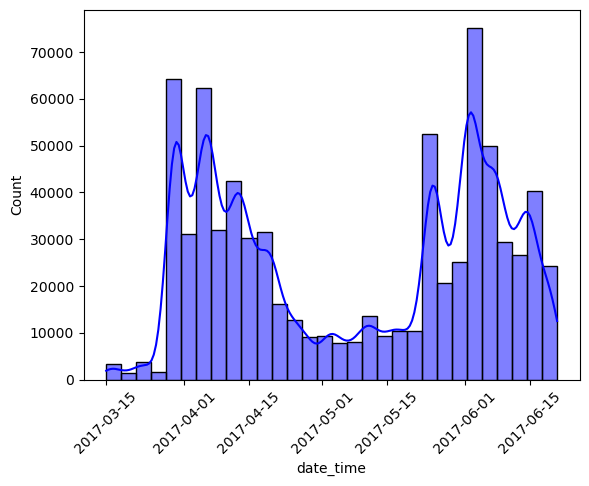

In [57]:
sns.histplot(merged_df['date_time'], kde=True, bins=30, color="blue")
plt.xticks(rotation=45)
plt.show()

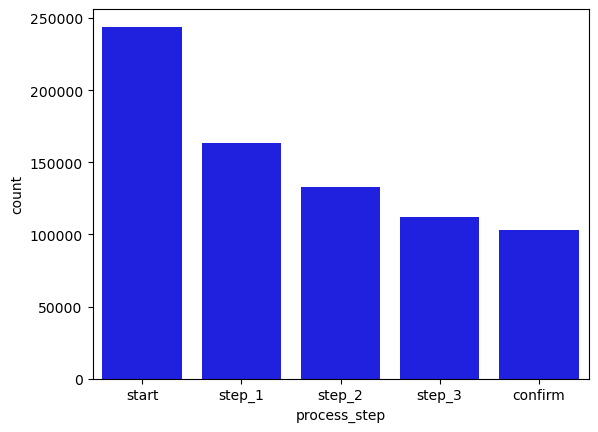

In [60]:
order = merged_df['process_step'].value_counts().index
sns.countplot(data=merged_df, x='process_step', color = "blue", legend=False, order=order)
plt.show()